In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA as PCA_sklearn

In [8]:
# Подгрузим набор данных
data = load_breast_cancer()
X = data.data
y = data.target

569


In [9]:
# Реализуем метод главных компонент с 2 аргументами: входные данные и и искомое число главных компонент
def pca(X, K):
    X_meaned = X - np.mean(X, axis=0)

    cov_matrix = np.cov(X_meaned, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    eigenvector_subset = sorted_eigenvectors[:, :K]

    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced

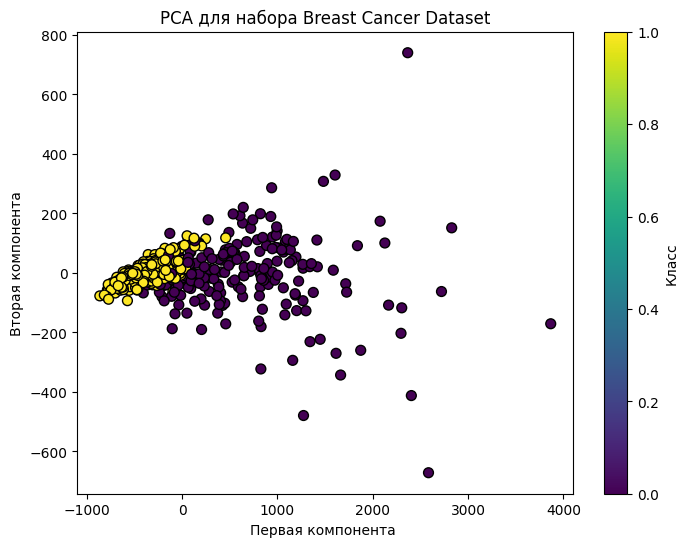

In [12]:

# Попробуем визуализировать данные с 2 главными компонентами
X_reduced = pca(X, 2)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA для набора Breast Cancer Dataset')
plt.xlabel('Первая компонента ')
plt.ylabel('Вторая компонента')
plt.colorbar(label='Класс')
plt.show()

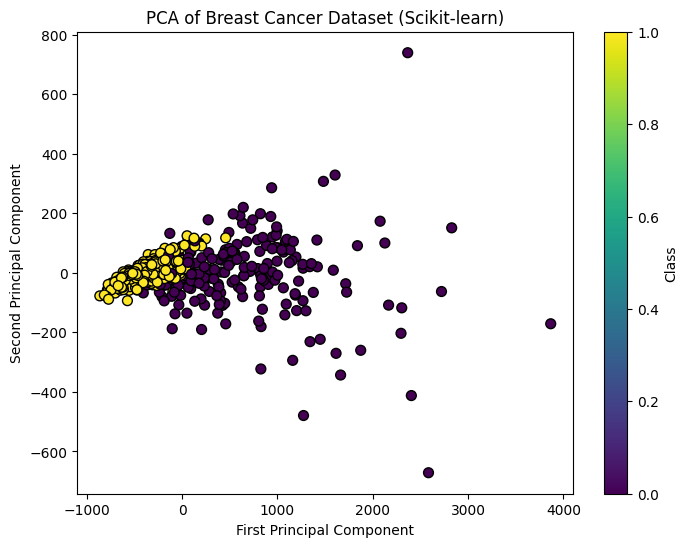

In [11]:
# Сделаем тоже самое с помощью готового метода в Scikit-learn
pca_sklearn = PCA_sklearn(n_components=2)
X_reduced_sklearn = pca_sklearn.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA для Breast Cancer Dataset (Scikit-learn)')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.colorbar(label='Класс')
plt.show()

In [14]:
# Находим оптимальное число главных компонент методом локтя
explained_variance = []
for K in range(1, X.shape[1] + 1):
    pca_sklearn = PCA_sklearn(n_components=K)
    pca_sklearn.fit(X)
    explained_variance.append(np.sum(pca_sklearn.explained_variance_ratio_))

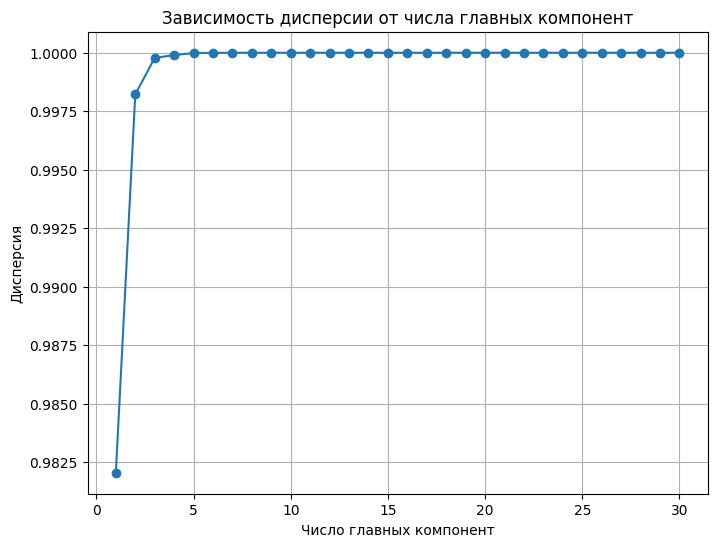

In [15]:
# Строим график зависимости дисперсии от числа главных компонент
plt.figure(figsize=(8, 6))
plt.plot(range(1, X.shape[1] + 1), explained_variance, marker='o')
plt.title('Зависимость дисперсии от числа главных компонент')
plt.xlabel('Число главных компонент')
plt.ylabel('Дисперсия')
plt.grid()
plt.show()

__Как будто после 5 компонент дисперсия не растет, значит Оптимальное число главных компонент = 5__